In [1]:
import pandas as pd 
import os
import pathlib
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import cv2
import PIL

In [2]:
path="Datasets"
path=pathlib.Path(path)
str(path)

'Datasets'

In [3]:
fresh = path.glob("**/FRESH/**/*")
fresh = [str(f) for f in fresh if f.suffix.lower() == ".jpg"]
fresh

['Datasets\\FRESH\\FreshBanana (1).jpg',
 'Datasets\\FRESH\\FreshBanana (10).jpg',
 'Datasets\\FRESH\\FreshBanana (100).jpg',
 'Datasets\\FRESH\\FreshBanana (101).jpg',
 'Datasets\\FRESH\\FreshBanana (102).jpg',
 'Datasets\\FRESH\\FreshBanana (103).jpg',
 'Datasets\\FRESH\\FreshBanana (104).jpg',
 'Datasets\\FRESH\\FreshBanana (105).jpg',
 'Datasets\\FRESH\\FreshBanana (106).jpg',
 'Datasets\\FRESH\\FreshBanana (107).jpg',
 'Datasets\\FRESH\\FreshBanana (108).jpg',
 'Datasets\\FRESH\\FreshBanana (109).jpg',
 'Datasets\\FRESH\\FreshBanana (11).jpg',
 'Datasets\\FRESH\\FreshBanana (110).jpg',
 'Datasets\\FRESH\\FreshBanana (111).jpg',
 'Datasets\\FRESH\\FreshBanana (112).jpg',
 'Datasets\\FRESH\\FreshBanana (113).jpg',
 'Datasets\\FRESH\\FreshBanana (114).jpg',
 'Datasets\\FRESH\\FreshBanana (115).jpg',
 'Datasets\\FRESH\\FreshBanana (116).jpg',
 'Datasets\\FRESH\\FreshBanana (117).jpg',
 'Datasets\\FRESH\\FreshBanana (118).jpg',
 'Datasets\\FRESH\\FreshBanana (119).jpg',
 'Datasets\\FRE

In [4]:
rotten = path.glob("**/ROTTEN/**/*")
rotten = [str(f) for f in rotten if f.suffix.lower() == ".jpg"]
rotten

['Datasets\\ROTTEN\\RottenApple (1).jpg',
 'Datasets\\ROTTEN\\RottenApple (10).jpg',
 'Datasets\\ROTTEN\\RottenApple (100).jpg',
 'Datasets\\ROTTEN\\RottenApple (101).jpg',
 'Datasets\\ROTTEN\\RottenApple (102).jpg',
 'Datasets\\ROTTEN\\RottenApple (103).jpg',
 'Datasets\\ROTTEN\\RottenApple (104).jpg',
 'Datasets\\ROTTEN\\RottenApple (105).jpg',
 'Datasets\\ROTTEN\\RottenApple (106).jpg',
 'Datasets\\ROTTEN\\RottenApple (107).jpg',
 'Datasets\\ROTTEN\\RottenApple (108).jpg',
 'Datasets\\ROTTEN\\RottenApple (109).jpg',
 'Datasets\\ROTTEN\\RottenApple (11).jpg',
 'Datasets\\ROTTEN\\RottenApple (110).jpg',
 'Datasets\\ROTTEN\\RottenApple (111).jpg',
 'Datasets\\ROTTEN\\RottenApple (112).jpg',
 'Datasets\\ROTTEN\\RottenApple (113).jpg',
 'Datasets\\ROTTEN\\RottenApple (114).jpg',
 'Datasets\\ROTTEN\\RottenApple (115).jpg',
 'Datasets\\ROTTEN\\RottenApple (116).jpg',
 'Datasets\\ROTTEN\\RottenApple (117).jpg',
 'Datasets\\ROTTEN\\RottenApple (118).jpg',
 'Datasets\\ROTTEN\\RottenApple (119

In [5]:
def read_image(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img=img/255.0
    return img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

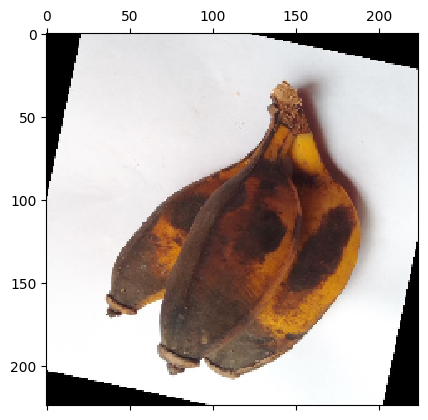

In [6]:
import matplotlib.pyplot as plt
t=read_image('Datasets\\ROTTEN\\RottenBanana (331).jpg')
plt.matshow(t)
t

In [7]:
fi,ri=[],[]
for i in fresh:
    fi.append(read_image(i))

In [8]:
for j in rotten[:5460]:
    ri.append(read_image(j))

In [9]:
fi=np.array(fi)
ri=np.array(ri)
ri.shape

(5460, 224, 224, 3)

In [10]:
fi.shape

(5460, 224, 224, 3)

In [11]:
f=pd.DataFrame({'target':[0]*len(fi)})
f

,target
0,0
1,0
2,0
3,0
4,0
...,...
5455,0
5456,0
5457,0
5458,0


In [12]:
r=pd.DataFrame({'target':[1]*len(ri)})

In [13]:
r

,target
0,1
1,1
2,1
3,1
4,1
...,...
5455,1
5456,1
5457,1
5458,1


In [14]:
r.shape

(5460, 1)

In [15]:
df=pd.concat([f,r],axis=0)

In [16]:
df['target'].value_counts()

target
0    5460
1    5460
Name: count, dtype: int64

In [22]:
fi = np.load('fi.npy', mmap_mode='r')
ri = np.load('ri.npy', mmap_mode='r')


FileNotFoundError: [Errno 2] No such file or directory: 'fi.npy'

In [17]:
X=np.concatenate([fi,ri],axis=0)

In [18]:
X.shape

(10920, 224, 224, 3)

In [19]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,(2,2),input_shape=(224,224,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(2,2),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(2,2),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])

c:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
y = df['target'][:fi.shape[0]]  # match the number of samples


In [25]:
fi_train, fi_test, ri_train, ri_test, y_train, y_test = train_test_split(
    fi, ri, y, test_size=0.2
)


MemoryError: Unable to allocate 4.90 GiB for an array with shape (4368, 224, 224, 3) and data type float64

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=3)

MemoryError: Unable to allocate 6.12 GiB for an array with shape (10920, 224, 224, 3) and data type float32

In [ ]:
model.evaluate(X_test,y_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.7678 - loss: 0.4637


[0.450330913066864, 0.773809552192688]

In [ ]:
X_test.shape

(2184, 224, 224, 3)

In [ ]:
y_pred=model.predict(X_test)
y_pred

69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step


array([[0.8790795 ],
       [0.71347207],
       [0.8458623 ],
       ...,
       [0.6477515 ],
       [0.87681174],
       [0.01164443]], dtype=float32)

In [26]:
from tensorflow.keras.models import load_model
cnn=load_model('rotten_potatoes.keras')

In [27]:
cnn.evaluate(X[4950:6000],df['target'][4950:6000])

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8663 - loss: 0.6519


[0.6758986115455627, 0.6095238327980042]

In [28]:
y_prob = cnn.predict(X)  # Output: probabilities between 0 and 1
y_pred = (y_prob > 0.5).astype("int")  # Converts to 0 or 1


MemoryError: Unable to allocate 6.12 GiB for an array with shape (10920, 224, 224, 3) and data type float32

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,df['taeget']))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1037
           1       0.96      0.95      0.96      1147

    accuracy                           0.95      2184
   macro avg       0.95      0.95      0.95      2184
weighted avg       0.95      0.95      0.95      2184



<Axes: >

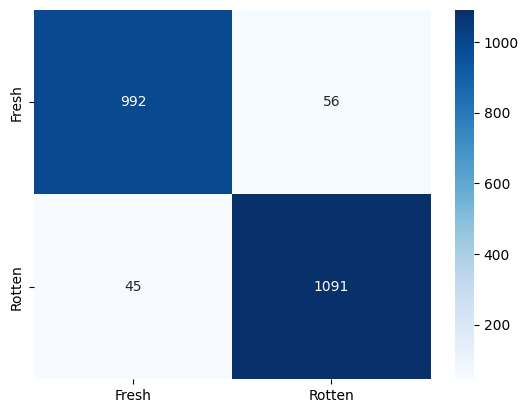

In [ ]:
cm=confusion_matrix(y_pred,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Fresh','Rotten'],yticklabels=['Fresh','Rotten'])